# AutoEncoders for Noise Removal in images

In [1]:
%config Completer.use_jedi = False        # For autocomplete to work!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

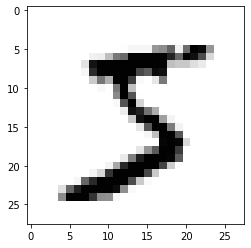

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [6]:
X_train = X_train / 255
X_test = X_test / 255

## Basic AutoEncoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

How many pixels in each image?

In [8]:
28*28

784

In [9]:
784/2

392.0

In [10]:
X_train[0].shape

(28, 28)

In [11]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [12]:
25/784

0.03188775510204082

Around 3,2% of original data features.

In [13]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid')) # Basically doing binary cross
decoder.add(Reshape([28, 28]))

In [14]:
autoencoder = Sequential([encoder, decoder])

In [15]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(lr=1.5),
                    metrics=['accuracy'])

In [16]:
autoencoder.fit(X_train, X_train, epochs = 5,
                validation_data = (X_test, X_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2520 - accuracy: 0.0824 - val_loss: 0.2213 - val_accuracy: 0.1101
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1878 - accuracy: 0.1555 - val_loss: 0.1656 - val_accuracy: 0.1805
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1573 - accuracy: 0.2002 - val_loss: 0.1499 - val_accuracy: 0.2065
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1469 - accuracy: 0.2157 - val_loss: 0.1456 - val_accuracy: 0.2142
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1389 - accuracy: 0.2258 - val_loss: 0.1321 - val_accuracy: 0.2306


In [17]:
passed_images = autoencoder.predict(X_test[:10])

Original image


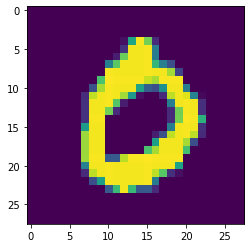

Attempted Reconstruction (after autoencoded)


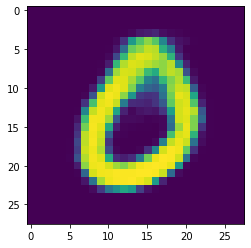

In [20]:
n = 3
print('Original image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (after autoencoded)')
plt.imshow(passed_images[n])

# AutoEncoders for Denoising Images

In [21]:
from tensorflow.keras.layers import GaussianNoise

In [22]:
sample = GaussianNoise(0.2)

In [23]:
noisey = sample(X_test[0:10], training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original


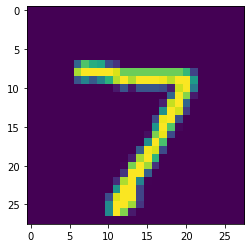

Noise version


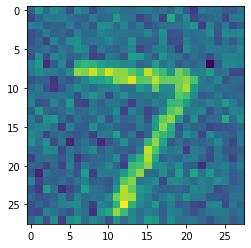

In [24]:
n = 0
print('Original')
plt.imshow(X_test[n])
plt.show()
print('Noise version')
plt.imshow(noisey[n])
plt.show()

### Create  noise removal autoencoder and train it.

In [25]:
import tensorflow as tf
import numpy as np

In [26]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400, activation='relu'))
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

In [27]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid')) # Basically doing binary cross
decoder.add(Reshape([28, 28]))

In [28]:
noise_remover = Sequential([encoder, decoder])

In [29]:
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [30]:
noise_remover.fit(X_train, X_train, epochs=8,
                  validation_data=(X_test, X_test))

Epoch 1/8
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1692 - accuracy: 0.1826 - val_loss: 0.1341 - val_accuracy: 0.2227
Epoch 2/8
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1293 - accuracy: 0.2314 - val_loss: 0.1200 - val_accuracy: 0.2450
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1205 - accuracy: 0.2448 - val_loss: 0.1136 - val_accuracy: 0.2583
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1149 - accuracy: 0.2551 - val_loss: 0.1083 - val_accuracy: 0.2668
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1114 - accuracy: 0.2624 - val_loss: 0.1070 - val_accuracy: 0.2599
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1092 - accuracy: 0.2674 - val_loss: 0.1057 - val_accuracy: 0.2665
Epoch 7/8
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1075 - accuracy: 0.2706 - val_loss: 0.1032 - val_accuracy:

In [31]:
ten_noisey_images = sample(X_test[0:10], training=True)
denoised = noise_remover(ten_noisey_images[0:10])

Original


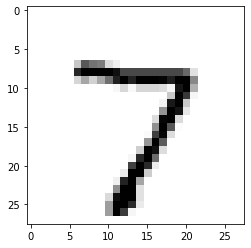

Noise added image


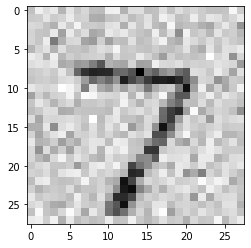

After noise removal from autoencoder


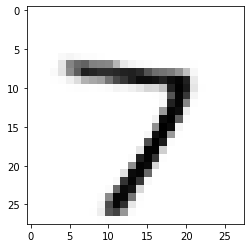

In [33]:
n = 0
print('Original')
plt.imshow(X_test[n], cmap='Greys')
plt.show()
print('Noise added image')
plt.imshow(ten_noisey_images[n], cmap='Greys')
plt.show()
print('After noise removal from autoencoder')
plt.imshow(denoised[n], cmap='Greys')
plt.show()